In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
import pandas as pd 
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df1 = df[df['target']=='setosa']
df2 = df[df['target']=='versicolor']
df3 = df[df['target']=='virginica']

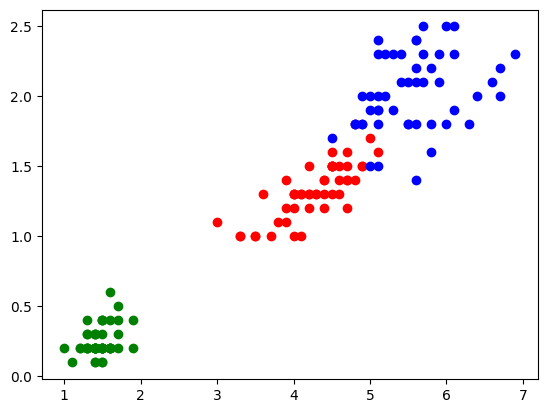

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')

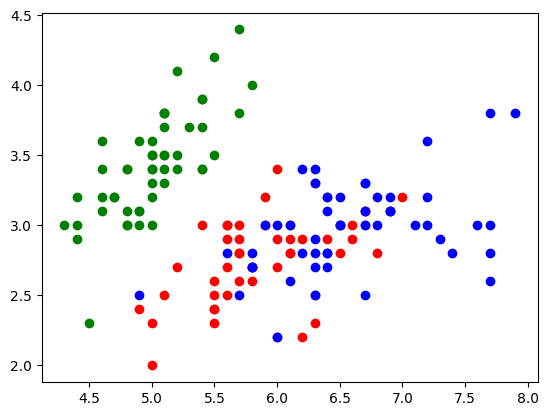

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='blue')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis=1),df['target'],test_size=0.2)

In [12]:
len(x_test)

30

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10) 

In [15]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
model.score(x_test,y_test)

0.9333333333333333

In [17]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
cm

array([[13,  0,  0],
       [ 0,  7,  2],
       [ 0,  0,  8]])

Text(50.722222222222214, 0.5, 'Actual')

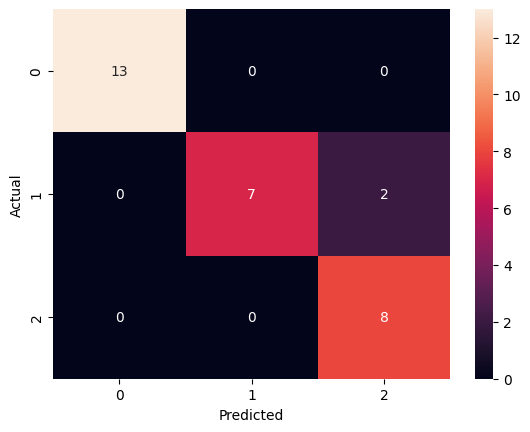

In [18]:
import seaborn as sns

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.78      0.88         9
   virginica       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

